In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
food_loss_data = "Resources/FAO_Food_Loss.csv"
loss_by_country = "Resources/Food_Loss_By_Country.csv"
gdp_values = "Resources/GDP_data.csv"

In [3]:
food_loss_df = pd.read_csv(food_loss_data)
by_country_df = pd.read_csv(loss_by_country)
gdp_df = pd.read_csv(gdp_values)
food_loss_df = pd.DataFrame(food_loss_df)
food_loss_df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,...,notes,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# filter out the empty columns
food_loss_clean = food_loss_df[["m49_code", "country", "region", "commodity", "year", "loss_percentage", "loss_percentage_original", "loss_quantity", "activity1", "activity2", "food_supply_stage", "treatment", "cause_of_loss"]]
food_loss_clean.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents


In [5]:
# Check number of rows per country
count_per_country = food_loss_clean.groupby("country")
count_per_country.count()

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
Africa,1,0,1,1,1,1,0,0,0,1,0,0
Algeria,2,0,2,2,2,2,0,0,0,2,0,0
Angola,726,0,726,726,726,726,0,726,220,616,0,0
Argentina,14,0,14,14,14,14,13,13,0,14,13,0
Armenia,38,0,38,38,38,38,0,20,8,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,16,0,16,16,16,16,8,11,3,15,11,0
Western Africa,4,0,4,4,4,4,0,4,0,4,0,0
Western Asia,5,0,5,5,5,5,0,5,2,5,0,0


In [6]:
# figure out which countries have the most data
count_per_country_sorted = count_per_country.count().sort_values(by="m49_code", ascending=False)
count_per_country_sorted.head(20)

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
United States of America,3094,0,3094,3094,3094,3094,13,191,96,3094,90,6
India,1354,140,1354,1354,1354,1354,111,1062,133,1351,46,136
Ethiopia,1064,27,1064,1064,1064,1064,8,1002,290,933,83,28
Kenya,1054,77,1054,1054,1054,1054,11,998,269,917,146,108
Uganda,866,31,866,866,866,866,7,851,279,734,8,18
Ghana,817,99,817,817,817,817,6,724,332,729,100,103
Malawi,803,14,803,803,803,803,9,747,223,693,29,18
Senegal,799,23,799,799,799,799,1,748,220,689,0,40
Zambia,772,5,772,772,772,772,1,762,220,684,4,8


In [7]:
# create df with our 15 African countries of choice
countries_list = ["Ethiopia", "Kenya", "Uganda", "Malawi", "Senegal", "Zambia", "Burkina Faso", "Angola", "Benin", "Mali", "United Republic of Tanzania", "Mozambique", "Rwanda", "Nigeria"]
african_data = food_loss_clean[food_loss_clean['country'].isin(countries_list)]
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [8]:
# rename/ re-characterize some rows

african_data.loc[african_data["activity1"] == "Storage", "food_supply_stage"] = "Storage"
african_data.loc[african_data["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
african_data.loc[african_data["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Drying", "food_supply_stage"] = "Farm"
african_data.loc[african_data["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [9]:
# isolate blank rows for food_supply_stage and activity1
blank_rows = african_data[african_data['food_supply_stage'].isnull() | (african_data['food_supply_stage'] == '') & (african_data['activity1'].isnull())]
blank_rows.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2903,204,Benin,NaN,Maize (corn),2000,17.80,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN
9729,404,Kenya,NaN,Maize (corn),2012,15.15,9.7-20.6,NaN,NaN,NaN,NaN,NaN,NaN
10039,404,Kenya,NaN,Maize (corn),2006,5.75,3.9-7.6,NaN,NaN,NaN,NaN,NaN,NaN
10040,404,Kenya,NaN,Maize (corn),2006,24.20,19.3-29.1,NaN,NaN,NaN,NaN,NaN,NaN
10117,404,Kenya,NaN,Maize (corn),2004,14.25,13.5-15,NaN,NaN,NaN,NaN,NaN,Insects; Maize Stem Borer


In [10]:
# display african_data without blank rows for food_supply_stage
african_data = african_data.drop(blank_rows.index)
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [11]:
# find average of loss percentage for each supply stage and rank the results

amount_of_waste = african_data.groupby("food_supply_stage")["loss_percentage"].mean()
amount_of_waste_sorted = amount_of_waste.sort_values(ascending=False)
amount_of_waste_sorted = pd.DataFrame(amount_of_waste_sorted)
amount_of_waste_sorted.head()

,loss_percentage
food_supply_stage,
Export,25.750000
Retail,18.872182
Post-harvest,18.084444
Wholesale,15.080364
Whole supply chain,13.768627


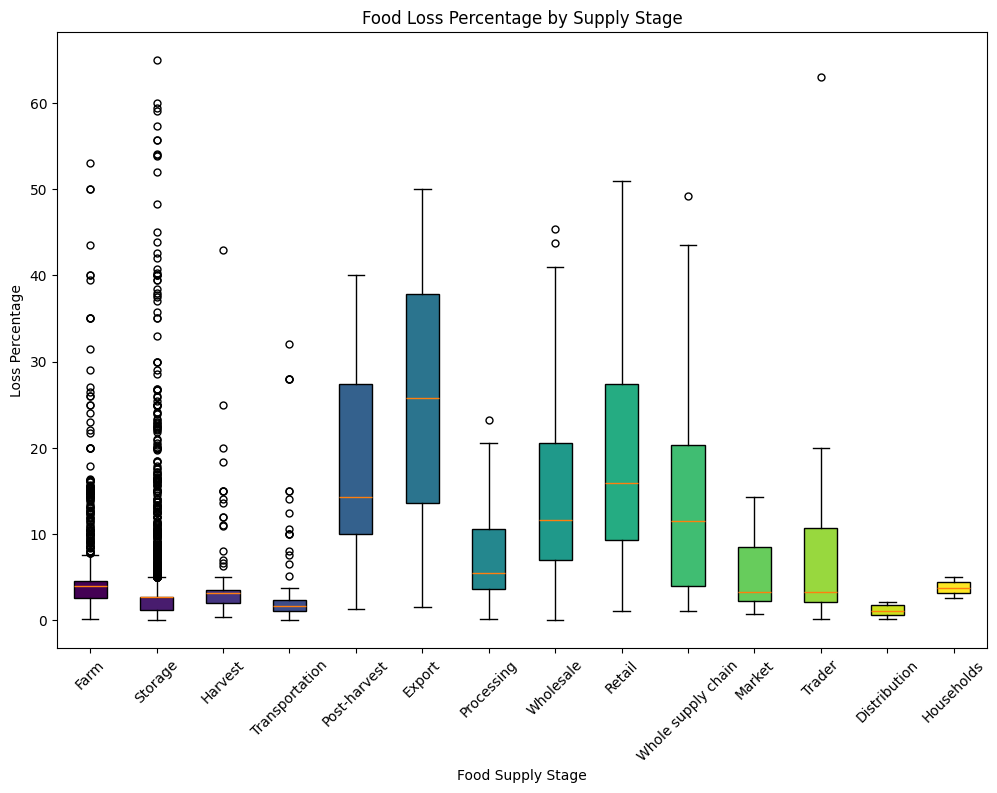

In [12]:
# Create a box plot for food loss percentage by supply stage

plt.figure(figsize=(12, 8))
flierprops = dict(marker='o', markersize=5, linestyle='none')
box_data = [african_data[african_data['food_supply_stage'] == stage]['loss_percentage'] for stage in african_data['food_supply_stage'].unique()]
boxplot = plt.boxplot(box_data, tick_labels=african_data['food_supply_stage'].unique(), patch_artist=True, showfliers=True, flierprops = flierprops)
# Color code each boxplot with a different color
colors = plt.cm.viridis(np.linspace(0, 1, len(box_data)))  # Generate a list of colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
# Customize the plot
plt.title('Food Loss Percentage by Supply Stage')
plt.xlabel('Food Supply Stage')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Explanation: 
This is the one we made together in class. We can point out the supply stages with the greatest average waste, such as export, post-harvest, etc. and give short explanations of each to the class, so everyone has an understanding of which part of the process (farm to table) generates the greatest loss.

In [13]:
commodity_wasted = african_data.groupby("commodity")["loss_percentage"].mean()
commodity_wasted_sorted = commodity_wasted.sort_values(ascending=False)

In [14]:
waste_by_year = african_data.groupby("year")["loss_percentage"].mean()
waste_by_year_sorted = waste_by_year.sort_values(ascending=False)

In [15]:
# create a simple dataframe for waste by year
waste_by_year = pd.DataFrame(waste_by_year)
waste_by_year.reset_index(inplace=True)
waste_by_year.head()

,year,loss_percentage
0,1968,5.4000
1,1969,14.2500
2,1970,18.5000
3,1973,14.2500
4,1974,18.8525


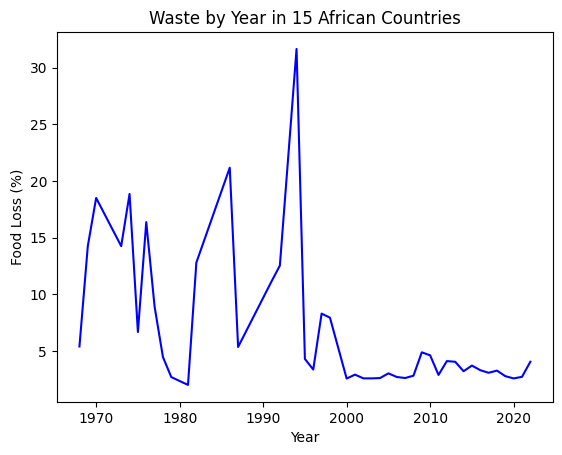

In [16]:
x_axis = waste_by_year["year"]
y_axis = waste_by_year["loss_percentage"]
plt.plot(x_axis, y_axis, color = 'b')
plt.title("Waste by Year in 15 African Countries")
plt.xlabel("Year")
plt.ylabel("Food Loss (%)")
plt.show()

# Explanation: 
A very simple line plot showing waste over time, on average, in our 15 African countries. We can discuss the spike in the 90s and lower levels of waste in 2000-2020.

In [17]:
waste_by_country = african_data.groupby("country")["loss_percentage"].mean()
waste_by_country_sorted = waste_by_country.sort_values(ascending=False)

In [18]:
# dataframe for waste by country (second dataset)
by_country_df = pd.DataFrame(by_country_df)
by_country_df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [19]:
# take a look at which regions we have
regions = by_country_df["Region"].unique()
print(regions)

['Southern Asia' 'Southern Europe' 'Northern Africa' 'Sub-Saharan Africa'
 'Latin America and the Caribbean' 'Western Asia'
 'Australia and New Zealand' 'Western Europe' 'Eastern Europe'
 'Northern America' 'South-eastern Asia' 'Eastern Asia' 'Northern Europe'
 'Melanesia' 'Polynesia' 'Micronesia' 'Central Asia']


In [20]:
# number of countries in each region
region_counts = by_country_df.groupby("Region")["Country"].count()
region_counts.sort_values(ascending = False)

Region
Sub-Saharan Africa                 48
Latin America and the Caribbean    42
Western Asia                       18
Southern Europe                    15
Northern Europe                    12
South-eastern Asia                 11
Eastern Europe                     10
Western Europe                      9
Southern Asia                       9
Eastern Asia                        7
Micronesia                          7
Northern Africa                     6
Melanesia                           5
Central Asia                        5
Northern America                    4
Polynesia                           4
Australia and New Zealand           2
Name: Country, dtype: int64

In [21]:
# create df for GDP data
gdp_df = pd.DataFrame(gdp_df)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264110,28419.264530,28449.712950,29329.081750,30918.483580,31902.809820,24008.127820,29127.759380,33300.838820,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342518,166.263682,171.961916,182.018480,192.639989,202.847824,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130070,139.291222,148.821355,156.314136,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


In [22]:
# create simple dataframe for 2023 GDP by country
recent_gdp = gdp_df[["Country Name", "2023"]]
recent_gdp = pd.DataFrame(recent_gdp)
recent_gdp.head()

,Country Name,2023
0,Aruba,NaN
1,Africa Eastern and Southern,1672.505957
2,Afghanistan,NaN
3,Africa Western and Central,1584.333285
4,Angola,2309.521620


In [23]:
# rename some columns for easy merging
recent_gdp.rename(columns={'Country Name': 'Country'}, inplace=True)
recent_gdp.rename(columns = {'2023': '2023 GDP'}, inplace = True)
recent_gdp.head()

,Country,2023 GDP
0,Aruba,NaN
1,Africa Eastern and Southern,1672.505957
2,Afghanistan,NaN
3,Africa Western and Central,1584.333285
4,Angola,2309.521620


In [24]:
# merge GDP data with food waste by country dataframe
merged_data = pd.merge(by_country_df, recent_gdp, on="Country")
merged_data.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...,NaN
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...,8367.775731
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...,5260.206250
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...,46544.720720
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,2309.521620


In [25]:
# drop countries with no GDP data for 2023
merged_data.dropna(axis=0, how='any', inplace=True)
merged_data.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...,8367.775731
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...,5260.206250
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...,46544.720720
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,2309.521620
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...,21560.215330


In [26]:
print(merged_data["2023 GDP"].max())
print(merged_data["2023 GDP"].min())

128259.4026
199.5807602


In [27]:
# Low income = <1000, Lower Middle = 1000 - 5000, Middle = 5501 - 10000, Upper Middle = 10001 - 50000, High = > 5000
# Establish the bins for class groups
size_bins = [0, 1000, 5000, 15000, 50000, 150000]
labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income"]
merged_data["GDP Class"] = pd.cut(merged_data["2023 GDP"], 
                                              size_bins, labels=labels, include_lowest = True)
merged_data.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP,GDP Class
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...,8367.775731,Middle
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...,5260.206250,Middle
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...,46544.720720,Upper Middle
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,2309.521620,Lower Middle
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...,21560.215330,Upper Middle


In [28]:
# check out how many countries are in each class group
class_groups = merged_data.groupby("GDP Class")["Country"].count()
class_groups

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_42939/33405906.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_groups = merged_data.groupby("GDP Class")["Country"].count()


GDP Class
Low Income      14
Lower Middle    47
Middle          46
Upper Middle    38
High Income     17
Name: Country, dtype: int64

In [29]:
# find averages for low income countries
low_income_data = merged_data[merged_data["GDP Class"] == "Low Income"]
household_mean_low = low_income_data["Household estimate (kg/capita/year)"].mean()
retail_mean_low = low_income_data["Retail estimate (kg/capita/year)"].mean()
service_mean_low = low_income_data["Food service estimate (kg/capita/year)"].mean()
combined_mean_low = household_mean_low + retail_mean_low + service_mean_low
print(retail_mean_low, household_mean_low, service_mean_low, combined_mean_low)
low_income_data.head()

16.0 102.78571428571429 28.0 146.78571428571428


,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP,GDP Class
27,Burkina Faso,147,103,2086893,16,317831,28,561848,Very Low Confidence,854,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,874.121280,Low Income
28,Burundi,147,103,1184127,16,180341,28,318799,Very Low Confidence,108,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,199.580760,Low Income
34,Central African Republic,147,103,487305,16,74216,28,131196,Very Low Confidence,140,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,445.028196,Low Income
35,Chad,147,103,1637656,16,249413,28,440901,Very Low Confidence,148,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,719.384875,Low Income
72,Guinea-Bissau,147,103,197266,16,30043,28,53109,Very Low Confidence,624,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,914.275154,Low Income


In [30]:
# find averages for lower middle income countries
lower_middle_income_data = merged_data[merged_data["GDP Class"] == "Lower Middle"]
household_mean_lower_middle = lower_middle_income_data["Household estimate (kg/capita/year)"].mean()
retail_mean_lower_middle = lower_middle_income_data["Retail estimate (kg/capita/year)"].mean()
service_mean_lower_middle = lower_middle_income_data["Food service estimate (kg/capita/year)"].mean()
combined_mean_lower_middle = household_mean_lower_middle + retail_mean_lower_middle + service_mean_lower_middle
print(retail_mean_lower_middle, household_mean_lower_middle, service_mean_lower_middle, combined_mean_lower_middle)
lower_middle_income_data.head()

15.893617021276595 93.53191489361703 27.53191489361702 136.95744680851064


,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP,GDP Class
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,2309.521620,Lower Middle
13,Bangladesh,84,65,10618233,16,2550080,3,544436,Very Low Confidence,50,Southern Asia,https://www.unep.org/resources/report/unep-foo...,2529.080127,Lower Middle
18,Benin,144,100,1175297,16,184573,28,326280,Very Low Confidence,204,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,1434.662834,Lower Middle
29,Cabo Verde,144,100,54765,16,8601,28,15204,Very Low Confidence,132,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,4321.579864,Lower Middle
30,Cambodia,130,86,1423397,16,257853,28,455820,Very Low Confidence,116,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...,1875.071482,Lower Middle


In [31]:
# find averages for middle income countries
middle_income_data = merged_data[merged_data["GDP Class"] == "Middle"]
household_mean_middle = middle_income_data["Household estimate (kg/capita/year)"].mean()
retail_mean_middle = middle_income_data["Retail estimate (kg/capita/year)"].mean()
service_mean_middle = middle_income_data["Food service estimate (kg/capita/year)"].mean()
combined_mean_middle = household_mean_middle + retail_mean_middle + service_mean_middle
print(retail_mean_middle, household_mean_middle, service_mean_middle, combined_mean_middle)
middle_income_data.head()

17.130434782608695 77.67391304347827 29.130434782608695 123.93478260869566


,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP,GDP Class
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...,8367.775731,Middle
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...,5260.206250,Middle
6,Argentina,116,72,3243563,16,700380,28,1238100,Very Low Confidence,32,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...,13730.514710,Middle
7,Armenia,137,93,275195,16,46259,28,81775,Very Low Confidence,51,Western Asia,https://www.unep.org/resources/report/unep-foo...,8715.765336,Middle
11,Azerbaijan,137,93,934872,16,157148,28,277800,Very Low Confidence,31,Western Asia,https://www.unep.org/resources/report/unep-foo...,7155.083604,Middle


In [32]:
# find averages for upper middle income countries
upper_middle_income_data = merged_data[merged_data["GDP Class"] == "Upper Middle"]
household_mean_upper_middle = upper_middle_income_data["Household estimate (kg/capita/year)"].mean()
retail_mean_upper_middle = upper_middle_income_data["Retail estimate (kg/capita/year)"].mean()
service_mean_upper_middle = upper_middle_income_data["Food service estimate (kg/capita/year)"].mean()
combined_mean_upper_middle = household_mean_upper_middle + retail_mean_upper_middle + service_mean_upper_middle
print(retail_mean_upper_middle, household_mean_upper_middle, service_mean_upper_middle, combined_mean_upper_middle)
upper_middle_income_data.head()

12.394736842105264 81.07894736842105 25.18421052631579 118.65789473684211


,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP,GDP Class
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...,46544.72072,Upper Middle
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...,21560.21533,Upper Middle
12,Bahrain,171,132,216161,13,21026,26,41966,Low Confidence,48,Western Asia,https://www.unep.org/resources/report/unep-foo...,29084.30713,Upper Middle
14,Barbados,113,74,21215,13,3677,26,7339,Low Confidence,52,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...,22672.61544,Upper Middle
25,Brunei Darussalam,119,80,34739,13,5551,26,11080,Low Confidence,96,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...,33430.91848,Upper Middle


In [33]:
# find averages for high income countries
high_income_data = merged_data[merged_data["GDP Class"] == "High Income"]
household_mean_high = high_income_data["Household estimate (kg/capita/year)"].mean()
retail_mean_high = high_income_data["Retail estimate (kg/capita/year)"].mean()
service_mean_high = high_income_data["Food service estimate (kg/capita/year)"].mean()
combined_mean_high = household_mean_high + retail_mean_high + service_mean_high
print(retail_mean_high, household_mean_high, service_mean_high, combined_mean_high)
high_income_data.head()

14.588235294117647 74.58823529411765 25.58823529411765 114.76470588235296


,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,2023 GDP,GDP Class
9,Australia,133,102,2563110,9,238248,22,546340,High Confidence,36,Australia and New Zealand,https://www.unep.org/resources/report/unep-foo...,64711.76560,High Income
10,Austria,76,39,349249,9,77289,28,254191,High Confidence,40,Western Europe,https://www.unep.org/resources/report/unep-foo...,56505.96828,High Income
16,Belgium,80,50,576036,10,112100,20,227371,Medium Confidence,56,Western Europe,https://www.unep.org/resources/report/unep-foo...,53475.29350,High Income
32,Canada,118,79,2938321,13,479284,26,956615,Low Confidence,124,Northern America,https://www.unep.org/resources/report/unep-foo...,53371.69743,High Income
45,Denmark,132,81,469449,30,172003,21,119134,High Confidence,208,Northern Europe,https://www.unep.org/resources/report/unep-foo...,67967.38187,High Income


In [34]:
# create a new dataframe with our findings
waste_by_class = pd.DataFrame({ "Low Income": [household_mean_low, retail_mean_low, service_mean_low],
                               "Lower Middle Income": [household_mean_lower_middle, retail_mean_lower_middle, service_mean_lower_middle],
                               "Middle Income": [household_mean_middle, retail_mean_middle, service_mean_middle],
                               "Upper Middle Income": [household_mean_upper_middle, retail_mean_upper_middle, service_mean_upper_middle],
                               "High Income": [household_mean_high, retail_mean_high, service_mean_high] })
waste_by_class
                               

,Low Income,Lower Middle Income,Middle Income,Upper Middle Income,High Income
0,102.785714,93.531915,77.673913,81.078947,74.588235
1,16.000000,15.893617,17.130435,12.394737,14.588235
2,28.000000,27.531915,29.130435,25.184211,25.588235


In [35]:
# create the final waste by class dataframe!
new_index_names = {0: 'Household Mean', 1: 'Retail Mean', 2: 'Service Mean', 3: 'Combined Mean'}
waste_by_class = waste_by_class.rename(index=new_index_names)
waste_by_class = waste_by_class.T
waste_by_class

,Household Mean,Retail Mean,Service Mean
Low Income,102.785714,16.000000,28.000000
Lower Middle Income,93.531915,15.893617,27.531915
Middle Income,77.673913,17.130435,29.130435
Upper Middle Income,81.078947,12.394737,25.184211
High Income,74.588235,14.588235,25.588235


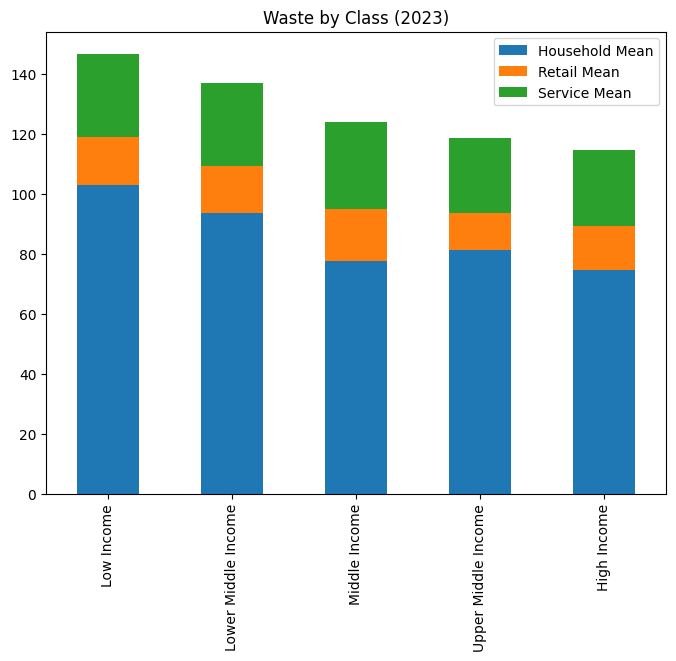

In [36]:
# stacked bar chart for waste by class
waste_by_class.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Waste by Class (2023)')
plt.show()

# Explanation: 
This shows waste by income level and breaks the total figures down by household mean, retail mean, and food service mean. I got this one by merging our second (smaller) dataset with GDP data from the World Bank. Unlike the other dataset, this one tracks waste by kg per capita instead of percentage. It seems to show that poorer countries waste higher volumes of food on average. I'm not sure if this is accurate, but maybe this is a result of waste being tracked differently. If we do choose to use this one, we can talk about how households waste the most food, followed by food service establishments. 

In [37]:
# make a new dataframe for 2021 gdp
gdp_2021 = gdp_df[["Country Name", "2021"]]
gdp_2021 = pd.DataFrame(gdp_2021)
gdp_2021.head()

,Country Name,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [38]:
# rename "Country Name" to "country" for easy merging
gdp_2021.rename(columns={'Country Name': 'country'}, inplace=True)
gdp_2021.head()

,country,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [39]:
# find average loss by country
average_by_country = food_loss_clean.groupby("country")["loss_percentage"].mean()
average_by_country

country
Africa            30.000000
Algeria           17.500000
Angola             2.519641
Argentina          1.038571
Armenia           11.368421
                    ...    
Viet Nam          11.100000
Western Africa     3.750000
Western Asia      14.800000
Zambia             2.668336
Zimbabwe           3.103270
Name: loss_percentage, Length: 127, dtype: float64

In [40]:
# create a dataframe for average loss by country
average_loss_df = { "country": food_loss_clean["country"].unique(), "average_loss": average_by_country}
average_loss_df = pd.DataFrame(average_loss_df)
average_loss_df.reset_index(drop=True, inplace=True)
average_loss_df

,country,average_loss
0,Myanmar,30.000000
1,Burundi,17.500000
2,Western Africa,2.519641
3,Cambodia,1.038571
4,Algeria,11.368421
...,...,...
122,United States of America,11.100000
123,Burkina Faso,3.750000
124,Uruguay,14.800000
125,Venezuela (Bolivarian Republic of),2.668336


In [41]:
# create a dataframe combining the first dataset with 2021 gdp
average_with_gdp = pd.merge(average_loss_df, gdp_2021, on="country")
average_with_gdp

,country,average_loss,2021
0,Myanmar,30.000000,1233.227770
1,Burundi,17.500000,221.157803
2,Cambodia,1.038571,1625.235021
3,Algeria,11.368421,4216.251285
4,Cameroon,18.402326,1654.257037
...,...,...,...
94,Ukraine,6.172656,4827.845703
95,Belize,35.227273,6060.968223
96,Burkina Faso,3.750000,888.803611
97,Uruguay,14.800000,17733.855160


In [42]:
# re-use our bins from before to designate classes
average_with_gdp["GDP Class"] = pd.cut(average_with_gdp["2021"], 
                                    size_bins, labels=labels, include_lowest = True)
average_with_gdp.head()

,country,average_loss,2021,GDP Class
0,Myanmar,30.000000,1233.227770,Lower Middle
1,Burundi,17.500000,221.157803,Low Income
2,Cambodia,1.038571,1625.235021,Lower Middle
3,Algeria,11.368421,4216.251285,Lower Middle
4,Cameroon,18.402326,1654.257037,Lower Middle


In [43]:
# create a dataframe for average loss by income class
average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()
average_loss_df = pd.DataFrame({"Average Loss by Class" : average_loss_stats})
average_loss_df

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_42939/3598848434.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()


,Average Loss by Class
GDP Class,
Low Income,8.794127
Lower Middle,9.396455
Middle,12.318256
Upper Middle,8.042649
High Income,15.390491


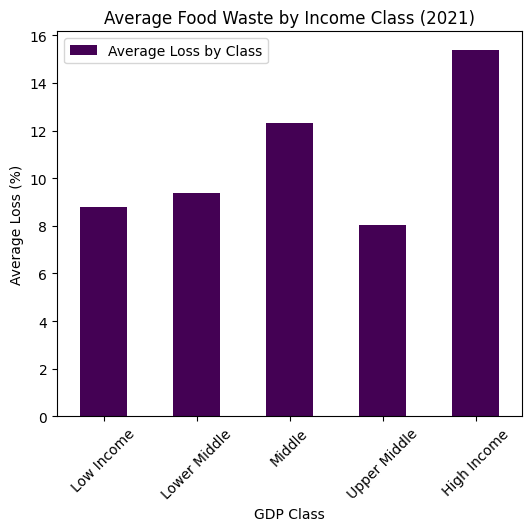

<Figure size 640x480 with 0 Axes>

In [44]:
# create a bar graph for average loss by income class
average_loss_df.plot(kind = "bar", cmap = 'viridis', figsize = (6, 5), ylabel = "Average Loss (%)", title = "Average Food Waste by Income Class (2021)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

# Explanation: 
This is a simple figure showing the differences in loss % between income classes, generated by merging our first (large) dataset with World Bank GDP data. There's a more complicated one below that breaks them down by supply stage, but this is a good start if we just want to talk about income levels on their own. I couldn't figure out how to make them different colors :(

In [45]:
# merge full food loss dataframe with 2021 gdp data
clean_with_gdp = pd.merge(food_loss_clean, average_with_gdp, on="country")
clean_with_gdp.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle


In [46]:
# rename/ re-characterize some rows

clean_with_gdp.loc[clean_with_gdp["activity1"] == "Storage", "food_supply_stage"] = "Storage"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Drying", "food_supply_stage"] = "Farm"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"

In [47]:
new_blank_rows = clean_with_gdp[clean_with_gdp['food_supply_stage'].isnull() | (clean_with_gdp['food_supply_stage'] == '') & (clean_with_gdp['activity1'].isnull())]
new_blank_rows.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
1716,156,China,NaN,Rice,1997,14.0,5.0-23,NaN,NaN,NaN,NaN,NaN,Excluding Processing Losses,12.346341,12617.505100,Middle
2451,204,Benin,NaN,Maize (corn),2000,17.8,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN,2.719588,1360.911474,Lower Middle
2539,214,Dominican Republic,NaN,Tomatoes,1977,14.8,14.8,NaN,NaN,NaN,NaN,NaN,NaN,11.754000,8476.749639,Middle
2540,214,Dominican Republic,NaN,Potatoes,1977,14.2,14.2,NaN,NaN,NaN,NaN,NaN,NaN,11.754000,8476.749639,Middle
2554,218,Ecuador,NaN,Maize (corn),2013,20.0,10.0-30,NaN,NaN,NaN,NaN,NaN,NaN,15.169130,6036.447274,Middle


In [48]:
clean_with_gdp = clean_with_gdp.drop(new_blank_rows.index)
clean_with_gdp.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle


In [65]:
# create a new column to add simplified supply stages
# farm stage: farm, harvest, pre-harvest, post-harvest
# storage stage: storage, packing, stacking
# transport stage: transportation, distribution
# export stage: export, trader
# wholesale stage: wholesale, market, processing
# retail stage: retail, food services, households
# whole supply chain is its own category
clean_with_gdp["Simplified Supply Stage"] = ''
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Farm", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Pre-harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Post-harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Storage", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Packing", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Stacking", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Transportation", "Simplified Supply Stage"] = "Transport Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Distribution", "Simplified Supply Stage"] = "Transport Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Export", "Simplified Supply Stage"] = "Export Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Trader", "Simplified Supply Stage"] = "Export Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Wholesale", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Market", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Processing", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Retail", "Simplified Supply Stage"] = "Retail Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Food Services", "Simplified Supply Stage"] = "Retail Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Households", "Simplified Supply Stage"] = "Retail Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Whole supply chain", "Simplified Supply Stage"] = "Whole supply chain"
clean_with_gdp.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class,Simplified Supply Stage
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage


In [50]:
# low income countries -- loss per supply stage
low_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Low Income"]
low_loss_per_stage = low_income_data2.groupby("food_supply_stage")["loss_percentage"].mean()
low_loss_per_year = low_income_data2.groupby("year")["loss_percentage"].mean()
low_loss_per_stage

food_supply_stage
Distribution           1.096000
Farm                   4.219361
Harvest                2.836932
Households             3.750000
Market                 8.490000
Post-harvest          10.097273
Processing             5.918000
Retail                14.168500
Storage                2.679333
Trader                 2.278000
Transportation         1.823791
Whole supply chain    13.026667
Wholesale             13.684091
Name: loss_percentage, dtype: float64

In [51]:
# low middle income countries -- loss per supply stage
low_middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Lower Middle"]
low_middle_loss_per_stage = low_middle_income_data2.groupby("food_supply_stage")["loss_percentage"].mean()
low_middle_loss_per_year = low_middle_income_data2.groupby("year")["loss_percentage"].mean()
low_middle_loss_per_stage

food_supply_stage
Distribution           8.455556
Export                12.158529
Farm                   4.419111
Food Services          6.050833
Harvest                3.208711
Households             7.269143
Market                 5.181897
Packing                0.600000
Post-harvest          19.174857
Pre-harvest            1.965000
Processing             5.130637
Retail                10.838962
Storage                3.697261
Trader                 6.663015
Transportation         2.060237
Whole supply chain    12.613045
Wholesale              8.607551
Name: loss_percentage, dtype: float64

In [52]:
# middle income countries -- loss per supply stage
middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Middle"]
middle_loss_per_stage = middle_income_data2.groupby("food_supply_stage")["loss_percentage"].mean()
middle_loss_per_year = middle_income_data2.groupby("year")["loss_percentage"].mean()
middle_loss_per_stage

food_supply_stage
Distribution           3.145000
Export                 1.000000
Farm                   4.731872
Food Services         13.862500
Harvest                3.702868
Households            16.000000
Market                11.833333
Post-harvest          27.390909
Pre-harvest            5.000000
Processing             7.585200
Retail                 4.371200
Stacking               2.100000
Storage                4.198061
Trader                17.118964
Transportation         1.565788
Whole supply chain    11.934087
Wholesale             10.909677
Name: loss_percentage, dtype: float64

In [53]:
# upper middle income countries -- loss per supply stage
upper_middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Upper Middle"]
upper_middle_loss_per_stage = upper_middle_income_data2.groupby("food_supply_stage")["loss_percentage"].mean()
upper_middle_loss_per_year = upper_middle_income_data2.groupby("year")["loss_percentage"].mean()
upper_middle_loss_per_stage

food_supply_stage
Export                 8.633333
Farm                  13.000000
Harvest               10.000000
Post-harvest          18.921429
Processing             7.140000
Retail                12.000000
Storage                2.550000
Transportation        14.875000
Whole supply chain    20.257143
Wholesale              1.300000
Name: loss_percentage, dtype: float64

In [54]:
# high income countries -- loss per supply stage
high_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "High Income"]
high_loss_per_stage = high_income_data2.groupby("food_supply_stage")["loss_percentage"].mean()
high_loss_per_year = high_income_data2.groupby("year")["loss_percentage"].mean()
high_loss_per_stage

food_supply_stage
Farm                  13.371604
Food Services         16.500000
Harvest                6.809412
Households            18.800000
Market                30.250000
Pre-harvest           15.325000
Processing            12.455750
Retail                 4.075000
Storage               11.264286
Transportation         9.000000
Whole supply chain    14.131746
Wholesale              5.734333
Name: loss_percentage, dtype: float64

In [55]:
# dataframe for waste by class by supply stage
loss_per_stage_df = pd.DataFrame({"Low Income": low_loss_per_stage, "Lower Middle Income": low_middle_loss_per_stage, 
                                  "Middle Income": middle_loss_per_stage, "Upper Middle Income": upper_middle_loss_per_stage,
                                  "High Income": high_loss_per_stage})
loss_per_stage_df.fillna(0, inplace=True)
loss_per_stage_df = loss_per_stage_df.T

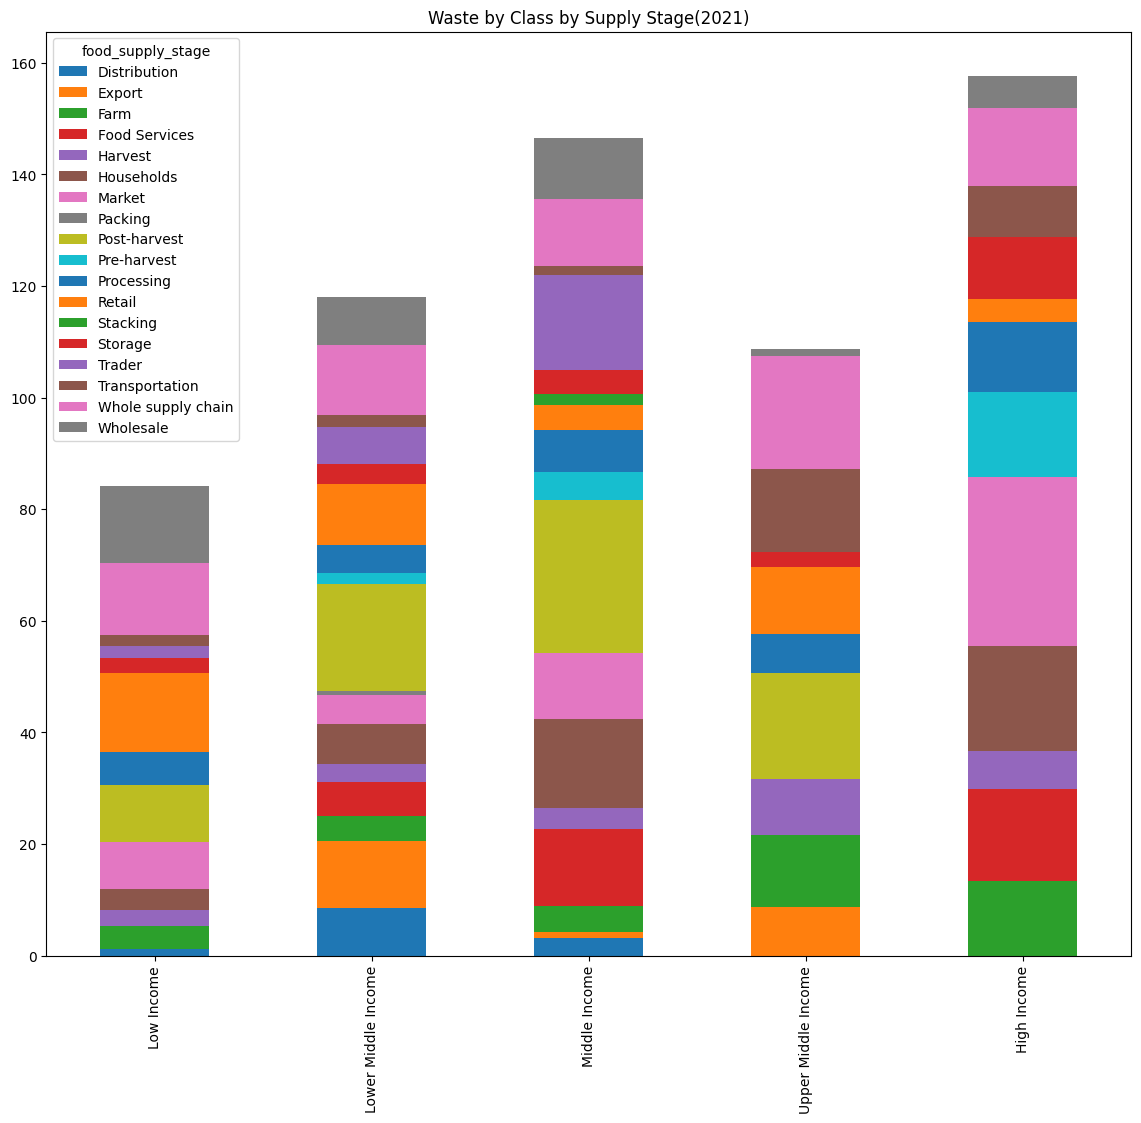

In [56]:
# stacked bar chart for waste by class by supply stage
loss_per_stage_df.plot(kind='bar', stacked=True, figsize=(14, 12))
plt.title('Waste by Class by Supply Stage(2021)')
plt.show()

# Explanation: 
This is a stacked bar graph showing waste by supply stage by class. I got the data from merging our first dataset with GDP figures from the World Bank. Each bar represents an income class, and is broken down into stages. There are probably ways to make it look better, but I think this is a good one to use and gives us a lot to talk about! Some examples: higher income countries have more waste overall, but fewer stages in which food is lost (example: there is no waste during post-harvest in wealthier countries, or at least none that was reported). Middle and High-income countries also waste a lot more food in households, whereas lower-income countries generate more waste during harvest. 

In [57]:
# make a dataframe just for US data
usa_df = food_loss_clean[food_loss_clean["country"] == "United States of America"]
usa_df.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
23107,840,United States of America,NaN,Asparagus,2019,9.0,9,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23108,840,United States of America,NaN,Cabbages,2019,7.0,7,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23109,840,United States of America,NaN,Cabbages,2019,8.0,8,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23110,840,United States of America,NaN,Cabbages,2019,12.0,12,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23111,840,United States of America,NaN,Cabbages,2019,12.0,12,NaN,NaN,NaN,Whole supply chain,NaN,NaN


In [58]:
# find waste percentage by commodity in the USA
commodity_waste = usa_df.groupby("commodity")["loss_percentage"].mean()
commodity_waste

commodity
Apple juice                                26.666700
Apples                                      5.437500
Apricots                                   11.323214
Artichokes                                  8.229630
Asparagus                                  10.028571
                                             ...    
Sweet potatoes                             10.743396
Tangerines, mandarins, clementines          5.594231
Tomatoes                                   15.220370
Vegetable products, fresh or dry n.e.c.    10.500000
Watermelons                                10.981132
Name: loss_percentage, Length: 80, dtype: float64

In [59]:
low_loss_per_year = pd.DataFrame(low_loss_per_year)
low_loss_per_year.reset_index(inplace = True)
low_loss_per_year = low_loss_per_year[low_loss_per_year['year'] >= 1990]

In [60]:
low_middle_loss_per_year = pd.DataFrame(low_middle_loss_per_year)
low_middle_loss_per_year.reset_index(inplace = True)
low_middle_loss_per_year = low_middle_loss_per_year[low_middle_loss_per_year['year'] >= 1990]

In [61]:
middle_loss_per_year = pd.DataFrame(middle_loss_per_year)
middle_loss_per_year.reset_index(inplace = True)
middle_loss_per_year = middle_loss_per_year[middle_loss_per_year['year'] >= 1990]

In [62]:
upper_middle_loss_per_year = pd.DataFrame(upper_middle_loss_per_year)
upper_middle_loss_per_year.reset_index(inplace = True)
upper_middle_loss_per_year = upper_middle_loss_per_year[upper_middle_loss_per_year['year'] >= 1990]

In [63]:
high_loss_per_year = pd.DataFrame(high_loss_per_year)
high_loss_per_year.reset_index(inplace = True)
high_loss_per_year = high_loss_per_year[high_loss_per_year['year'] >= 1990]

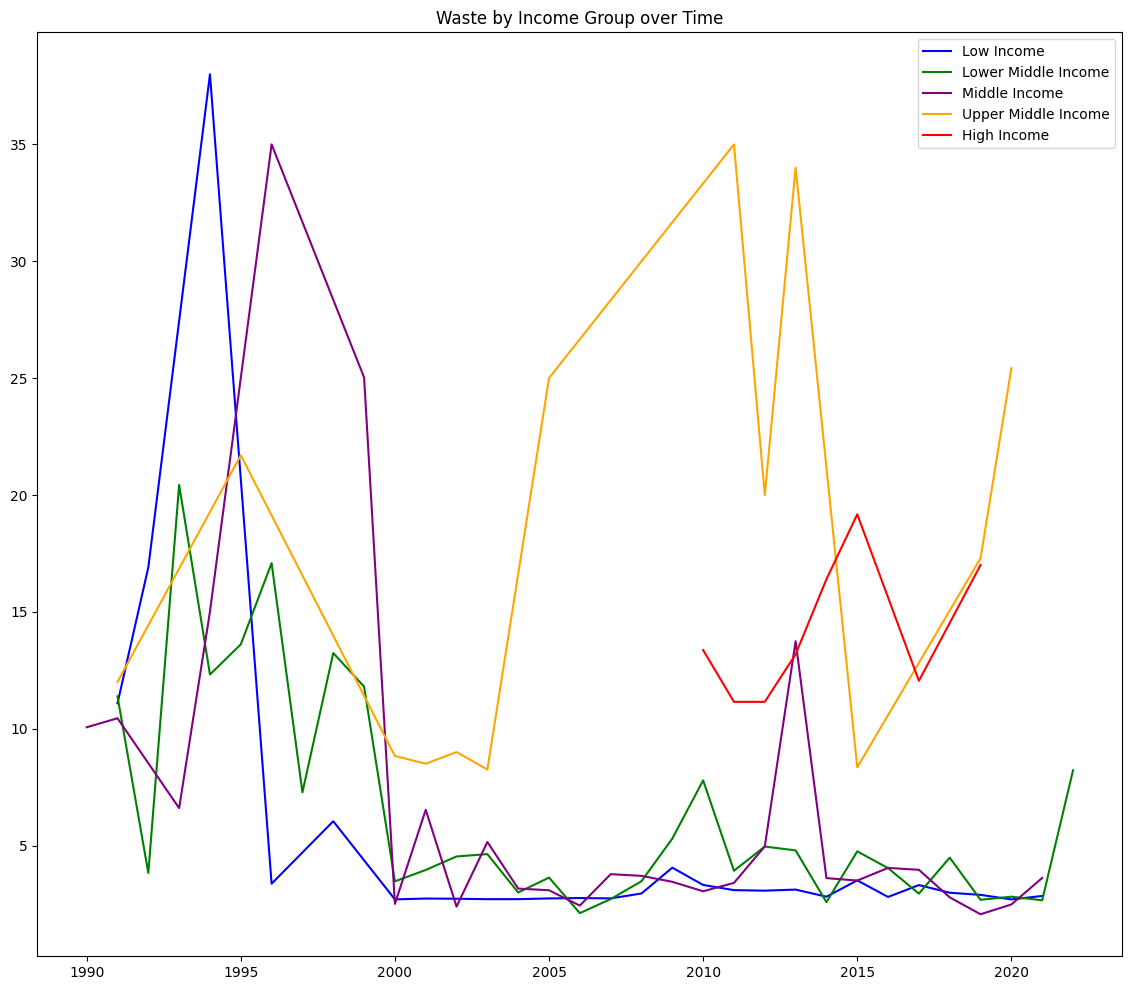

In [64]:
#line graph for waste by income level by year
plt.figure(figsize=(14, 12))
# Plot our line that will be used to track the first country's traveling companion percentage over the years
plt.plot(low_loss_per_year["year"], low_loss_per_year["loss_percentage"], color="blue", label="Low Income")
plt.plot(low_middle_loss_per_year["year"], low_middle_loss_per_year["loss_percentage"], color="green", label="Lower Middle Income")
plt.plot(middle_loss_per_year["year"], middle_loss_per_year["loss_percentage"], color="purple", label="Middle Income")
plt.plot(upper_middle_loss_per_year["year"], upper_middle_loss_per_year["loss_percentage"], color="orange", label="Upper Middle Income")
plt.plot(high_loss_per_year["year"], high_loss_per_year["loss_percentage"], color="red", label="High Income")
plt.legend()
plt.title("Waste by Income Group over Time")
# Print our chart to the screen
plt.show()

# Explanation: 
Here I made a line plot of waste by income group over time. Part of it looks shitty because there's a lot of year data missing for the high income countries. We may need to remove that plot if we want to use this figure. The similar trends between poorer countries give us something to discuss -- we can see if there were any events in the early 90s that may have caused spikes, and if there were any developments in the early 2000s that consistently lowered waste levels in low-middle income countries.